In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import scipy.stats as st

# Import API key
from api_keys import census_key

# Get output File (CSV)
census_2010_to_load = "Resources/census_data_2000_2010.csv"
census_2019_to_load = "Resources/census_data_portland.csv"

# Read census files and store into Pandas
census_2010 = pd.read_csv(census_2010_to_load, encoding="cp1252" )
census_2019 = pd.read_csv(census_2019_to_load)


In [2]:
# Pull specific city from data file
portland = census_2019.loc[census_2019['Geographic Area']=='Portland city, Oregon',:]

# Create dataframe
portland_df = pd.DataFrame(portland)

# Transpose rows and columns
pdx_df = portland_df.T

# Clean up columns and rename
pdx_df.reset_index(inplace=True)
pdx_df = pdx_df.rename(columns={'index':'Year'})
pdx_df = pdx_df[pdx_df['Year']!= "Geographic Area"]
pdx_df.columns.values[1]='Portland'


In [3]:
beaverton = census_2019.loc[census_2019['Geographic Area']=='Beaverton city, Oregon',:]

# Create dataframe
beaverton_df = pd.DataFrame(beaverton)

# Transpose rows and columns
beaverton_df = beaverton_df.T

# Clean up columns and rename
beaverton_df.reset_index(inplace=True)
beaverton_df = beaverton_df.rename(columns={'index':'Year'})
beaverton_df = beaverton_df[beaverton_df['Year']!= "Geographic Area"]
beaverton_df.columns.values[1]='Beaverton'

In [4]:
# Pull specific city from data file
gresham = census_2019.loc[census_2019['Geographic Area']=='Gresham city, Oregon',:]

# Create dataframe
gresham_df = pd.DataFrame(gresham)

# Transpose rows and columns
gresham_df = gresham_df.T

# Clean up columns and rename
gresham_df.reset_index(inplace=True)
gresham_df = gresham_df.rename(columns={'index':'Year'})
gresham_df = gresham_df[gresham_df['Year']!= "Geographic Area"]
gresham_df.columns.values[1]='Gresham'


In [5]:
# Pull specific city from data file
hillsboro = census_2019.loc[census_2019['Geographic Area']=='Hillsboro city, Oregon',:]

# Create dataframe
hillsboro_df = pd.DataFrame(hillsboro)

# Transpose rows and columns
hillsboro_df = hillsboro_df.T

# Clean up columns and rename
hillsboro_df.reset_index(inplace=True)
hillsboro_df = hillsboro_df.rename(columns={'index':'Year'})
hillsboro_df = hillsboro_df[hillsboro_df['Year']!= "Geographic Area"]
hillsboro_df.columns.values[1]='Hillsboro'


In [6]:
# Pull specific city from data file
oswego = census_2019.loc[census_2019['Geographic Area']=='Lake Oswego city, Oregon',:]

# Create dataframe
oswego_df = pd.DataFrame(oswego)

# Transpose rows and columns
oswego_df = oswego_df.T

# Clean up columns and rename
oswego_df.reset_index(inplace=True)
oswego_df = oswego_df.rename(columns={'index':'Year'})
oswego_df = oswego_df[oswego_df['Year']!= "Geographic Area"]
oswego_df.columns.values[1]='Lake Oswego'


In [7]:
# Pull specific city from data file
tigard = census_2019.loc[census_2019['Geographic Area']=='Tigard city, Oregon',:]

# Create dataframe
tigard_df = pd.DataFrame(tigard)

# Transpose rows and columns
tigard_df = tigard_df.T

# Clean up columns and rename
tigard_df.reset_index(inplace=True)
tigard_df = tigard_df.rename(columns={'index':'Year'})
tigard_df = tigard_df[tigard_df['Year']!= "Geographic Area"]
tigard_df.columns.values[1]='Tigard'


In [8]:
# Merge dataframes into a single dataframe 
cities_census = pd.merge(pdx_df, gresham_df, on=["Year"])
cities_census = pd.merge(cities_census, hillsboro_df, on=["Year"])
cities_census = pd.merge(cities_census, beaverton_df, on=["Year"])
cities_census = pd.merge(cities_census, tigard_df, on=["Year"])
cities_census = pd.merge(cities_census, oswego_df, on=["Year"])
cities_census

,Year,Portland,Gresham,Hillsboro,Beaverton,Tigard,Lake Oswego
0,2010,"585,429","106,008","92,559","90,100","48,326","36,813"
1,2011,"595,451","107,720","94,274","91,569","49,244","37,049"
2,2012,"604,264","108,779","96,343","92,558","49,818","37,284"
3,2013,"609,890","109,221","98,160","93,279","50,361","37,475"
4,2014,"620,510","110,029","99,827","94,714","50,674","37,842"
5,2015,"631,366","110,378","102,550","95,863","51,060","38,282"
6,2016,"642,720","111,762","105,374","97,738","51,978","38,699"
7,2017,"647,924","111,243","107,433","97,824","53,373","39,280"
8,2018,"650,837","109,808","108,201","98,775","54,652","39,524"
9,2019,"654,741","109,381","109,128","99,037","55,514","39,822"


In [9]:
portland2 = census_2010.loc[(census_2010['NAME']=='Portland city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
portland2_df = pd.DataFrame(portland2)

# Transpose rows and columns
pdx2_df = portland2_df.T
pdx2_df.reset_index(inplace=True)

# Rename columns
pdx2_df = pdx2_df.rename(columns={'index':'Year'})
pdx2_df.columns.values[1]='Portland'

# Drop unneeded rows
pdx2_df = pdx2_df[pdx2_df['Year']!= "NAME"] 
pdx2_df = pdx2_df[pdx2_df['Year']!= "STNAME"] 
pdx2_df = pdx2_df[pdx2_df['Year']!= "CENSUS2010POP"]

# Rename rows
pdx2_df['Year']=pdx2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))


In [10]:
beaverton2 = census_2010.loc[(census_2010['NAME']=='Beaverton city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
beaverton2_df = pd.DataFrame(beaverton2)

# Transpose rows and columns
beaverton2_df = beaverton2_df.T
beaverton2_df.reset_index(inplace=True)

# Rename columns
beaverton2_df = beaverton2_df.rename(columns={'index':'Year'})
beaverton2_df.columns.values[1]='Beaverton'

# Drop unneeded rows
beaverton2_df = beaverton2_df[beaverton2_df['Year']!= "NAME"] 
beaverton2_df = beaverton2_df[beaverton2_df['Year']!= "STNAME"] 
beaverton2_df = beaverton2_df[beaverton2_df['Year']!= "CENSUS2010POP"]

# Rename rows
beaverton2_df['Year']=beaverton2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))


In [11]:
gresham2 = census_2010.loc[(census_2010['NAME']=='Gresham city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
gresham2_df = pd.DataFrame(gresham2)

# Transpose rows and columns
gresham2_df = gresham2_df.T
gresham2_df.reset_index(inplace=True)

# Rename columns
gresham2_df = gresham2_df.rename(columns={'index':'Year'})
gresham2_df.columns.values[1]='Gresham'

# Drop unneeded rows
gresham2_df = gresham2_df[gresham2_df['Year']!= "NAME"] 
gresham2_df = gresham2_df[gresham2_df['Year']!= "STNAME"] 
gresham2_df = gresham2_df[gresham2_df['Year']!= "CENSUS2010POP"]

# Rename rows
gresham2_df['Year']=gresham2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))


In [12]:
hillsboro2 = census_2010.loc[(census_2010['NAME']=='Hillsboro city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
hillsboro2_df = pd.DataFrame(hillsboro2)

# Transpose rows and columns
hillsboro2_df = hillsboro2_df.T
hillsboro2_df.reset_index(inplace=True)

# Rename columns
hillsboro2_df = hillsboro2_df.rename(columns={'index':'Year'})
hillsboro2_df.columns.values[1]='Hillsboro'

# Drop unneeded rows
hillsboro2_df = hillsboro2_df[hillsboro2_df['Year']!= "NAME"] 
hillsboro2_df = hillsboro2_df[hillsboro2_df['Year']!= "STNAME"] 
hillsboro2_df = hillsboro2_df[hillsboro2_df['Year']!= "CENSUS2010POP"]

# Rename rows
hillsboro2_df['Year']=hillsboro2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))


In [13]:
tigard2 = census_2010.loc[(census_2010['NAME']=='Tigard city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
tigard2_df = pd.DataFrame(tigard2)

# Transpose rows and columns
tigard2_df = tigard2_df.T
tigard2_df.reset_index(inplace=True)

# Rename columns
tigard2_df = tigard2_df.rename(columns={'index':'Year'})
tigard2_df.columns.values[1]='Tigard'

# Drop unneeded rows
tigard2_df = tigard2_df[tigard2_df['Year']!= "NAME"]
tigard2_df = tigard2_df[tigard2_df['Year']!= "STNAME"] 
tigard2_df = tigard2_df[tigard2_df['Year']!= "CENSUS2010POP"]

# Rename rows
tigard2_df['Year']=tigard2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))


In [14]:
oswego2 = census_2010.loc[(census_2010['NAME']=='Lake Oswego city') & (census_2010['STNAME']=='Oregon')]
# Create dataframe
oswego2_df = pd.DataFrame(oswego2)

# Transpose rows and columns
oswego2_df = oswego2_df.T
oswego2_df.reset_index(inplace=True)

# Rename columns
oswego2_df = oswego2_df.rename(columns={'index':'Year'})
oswego2_df.columns.values[1]='Lake Oswego'

# Drop unneeded rows
oswego2_df = oswego2_df[oswego2_df['Year']!= "NAME"]
oswego2_df = oswego2_df[oswego2_df['Year']!= "STNAME"] 
oswego2_df = oswego2_df[oswego2_df['Year']!= "CENSUS2010POP"]

# Rename rows
oswego2_df['Year']=oswego2_df['Year'].apply(lambda x: x.replace('POPESTIMATE',''))

In [15]:
# Merge dataframes into a single dataframe 
cities_census2 = pd.merge(pdx2_df, gresham2_df, on=["Year"])
cities_census2 = pd.merge(cities_census2, hillsboro2_df, on=["Year"])
cities_census2 = pd.merge(cities_census2, beaverton2_df, on=["Year"])
cities_census2 = pd.merge(cities_census2, tigard2_df, on=["Year"])
cities_census2 = pd.merge(cities_census2, oswego2_df, on=["Year"])

In [16]:
cities_census2.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
# Drop repeated year
cities_census2 = cities_census2.drop([cities_census2.index[10]])

In [18]:
# Merge census dataframes into one dataframe containing all years
census_frames = [cities_census2,cities_census]
complete_census_df = pd.concat(census_frames)

# Reset index
complete_census_df= complete_census_df.reset_index(drop=True)


In [19]:
# Remove commas from entire dataframe
complete_census_df = complete_census_df.replace(',','', regex=True)


In [20]:
# Change data type for entire dataframe
complete_census_df = complete_census_df.astype(int)

# Sum total of all cities population for each year
complete_census_df['Total']= complete_census_df['Portland'] + complete_census_df['Gresham'] + complete_census_df['Hillsboro'] + complete_census_df['Beaverton'] + complete_census_df['Tigard'] + complete_census_df['Lake Oswego']
complete_census_df

,Year,Portland,Gresham,Hillsboro,Beaverton,Tigard,Lake Oswego,Total
0,2000,529845,90474,70888,78327,42750,35683,847967
1,2001,535755,92102,73693,80245,43697,35827,861319
2,2002,540833,93558,75754,81342,44192,36078,871757
3,2003,542496,94427,77463,82067,44488,36089,877030
4,2004,536636,93942,79178,82810,44795,36130,873491
5,2005,538053,94739,81666,84362,45539,36187,880546
6,2006,544669,96471,84307,86066,46365,36330,894208
7,2007,555306,98946,86139,86939,46743,36405,910478
8,2008,566850,101597,88029,87873,47153,36577,928079
9,2009,578104,104146,90239,89136,47744,36624,945993


In [21]:
# Save dataframe to csv file
complete_census_df.to_csv(r'Resources\Census_data.csv', index = False)

<Figure size 576x432 with 0 Axes>

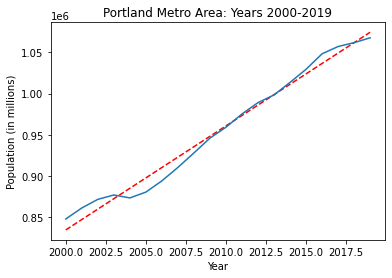

In [22]:
# Calculate a trend line
z = np.polyfit(complete_census_df["Year"], complete_census_df["Total"], 1)
p = np.poly1d(z)

#Plot of the population over years
plt.figure(figsize = (8,6))
fig, ax = plt.subplots()

ax.set_xlabel("Year")
ax.set_ylabel("Population (in millions)")
ax.set_title("Portland Metro Area: Years 2000-2019")

ax.plot(complete_census_df["Year"],p(complete_census_df["Year"]),"r--")
ax.plot(complete_census_df["Year"], complete_census_df["Total"])

plt.savefig("Annual_Images/Portland Metro Population Over Time")
plt.show()


In [23]:
# Read in Above Bonneville Dam Spring Chinook Counts
bonneville_file = "Resources/Chinook_Bonneville_Counts.csv"

# Grab only the columns we want
bonneville_salmon_df = pd.read_csv(bonneville_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
bonneville_salmon_df =  bonneville_salmon_df[ 
    (bonneville_salmon_df["Year"] > 1999) & 
    (bonneville_salmon_df["Year"] < 2021)
]

# Clean up data types
bonneville_salmon_df["Year"] = bonneville_salmon_df["Year"].astype('int')
bonneville_salmon_df["Chinook"] = bonneville_salmon_df["Chinook"].astype('int')


In [24]:
# Reset index
bonneville_salmon_df= bonneville_salmon_df.reset_index(drop=True)
bonneville_salmon_df.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [25]:
# Drop year that isn't included in census data
bonneville_salmon_df = bonneville_salmon_df.drop([bonneville_salmon_df.index[20]])

# Save dataframe to csv file
bonneville_salmon_df.to_csv(r'Resources\Bonneville_narrowed_census.csv', index = False)

# Calculate correlation between above bonneville salmon count and portland metro population
correlation = st.pearsonr(complete_census_df["Total"], bonneville_salmon_df["Chinook"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.39


The r-value is: -0.3938244919300225
The r-squared value is: 0.15509773044394035
The p-value is: 0.08578552007745797


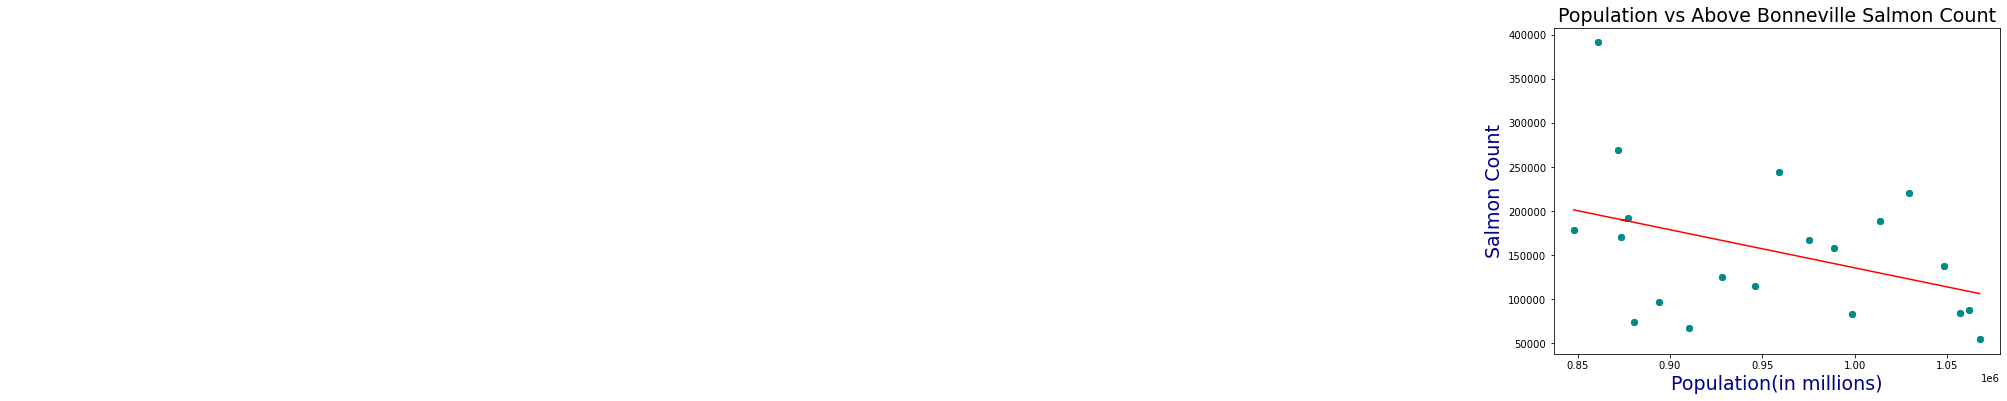

In [26]:
# Plot Portland Metro population vs Above Bonneville salmon count

# Calculate linear regression
plt.figure(figsize = (8,6))
x_values = complete_census_df["Total"]
y_values = bonneville_salmon_df["Chinook"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")

plt.title("Population vs Above Bonneville Salmon Count", size = 19)
plt.xlabel('Population(in millions)',size= 19,  color= "darkblue")
plt.ylabel('Salmon Count', size= 19,  color= "darkblue")
plt.scatter(complete_census_df["Total"], bonneville_salmon_df["Chinook"], color= "darkcyan")

plt.savefig("Annual_Images/Population vs Above Bonneville Salmon Count")
plt.show()     

In [27]:
# # Plot a scatter and regression of annual river depth and salmon counts to see if any correlation

# slope, intercept, rvalue, pvalue, stderr = linregress(complete_census_df["Total"], bonneville_salmon_df["Chinook"])
# regress_values = complete_census_df["Total"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(f"The r-value is: {rvalue}")
# print(f"The r2-value is: {rvalue**2}")
# print(f"The p-value is: {pvalue}")

# fig, ax = plt.subplots(figsize=(8,6))
# ax.set_xlabel("Population(in millions)")
# ax.set_ylabel("Spring Chinook Count")
# ax.set_title("Population vs Above Bonneville Salmon Count")
# ax.annotate(line_eq, (44,150000), fontsize=15, color="red")
# ax.plot(complete_census_df["Total"], regress_values, "r-")
# ax.scatter(complete_census_df["Total"], bonneville_salmon_df["Chinook"])
# plt.savefig("Annual_Images/Population vs Above Bonneville Salmon Count")
# plt.show()  

In [28]:
# Read in below bonneville salmon data file
below_bonneville_salmon = 'Resources\Below_Bonneville_Salmon_Count.csv'
below_bonneville_df = pd.read_csv(below_bonneville_salmon)

# Drop year that isn't included in census data
below_bonneville_df = below_bonneville_df.drop([below_bonneville_df.index[12]])
below_bonneville_df

,Year,Chin
0,2008,125582
1,2009,114548
2,2010,244419
3,2011,167132
4,2012,158088
5,2013,83339
6,2014,188079
7,2015,220471
8,2016,137204
9,2017,83623


In [29]:
# Copy complete census dataframe
reduced_yr_census = complete_census_df

In [30]:
# Drop years from census dataframe that aren't in salmon count dataframe
reduced_yr_census = reduced_yr_census.drop([reduced_yr_census.index[0],reduced_yr_census.index[1],reduced_yr_census.index[2],
                                             reduced_yr_census.index[3],reduced_yr_census.index[4],reduced_yr_census.index[5],
                                           reduced_yr_census.index[6],reduced_yr_census.index[7]])
# Save dataframes to csv file
reduced_yr_census.to_csv(r'Resources\Census_narrowed.csv', index = False)
below_bonneville_df.to_csv(r'Resources\Below_Bonneville_narrowed_census.csv', index = False)
reduced_yr_census

,Year,Portland,Gresham,Hillsboro,Beaverton,Tigard,Lake Oswego,Total
8,2008,566850,101597,88029,87873,47153,36577,928079
9,2009,578104,104146,90239,89136,47744,36624,945993
10,2010,585429,106008,92559,90100,48326,36813,959235
11,2011,595451,107720,94274,91569,49244,37049,975307
12,2012,604264,108779,96343,92558,49818,37284,989046
13,2013,609890,109221,98160,93279,50361,37475,998386
14,2014,620510,110029,99827,94714,50674,37842,1013596
15,2015,631366,110378,102550,95863,51060,38282,1029499
16,2016,642720,111762,105374,97738,51978,38699,1048271
17,2017,647924,111243,107433,97824,53373,39280,1057077


In [31]:
# Calculate correlation between below bonneville salmon count and portland metro population
correlation = st.pearsonr(reduced_yr_census["Total"], below_bonneville_df["Chin"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.38


The r-value is: -0.38392655190405217
The r-squared value is: 0.14739959725693486
The p-value is: 0.2179148843115568


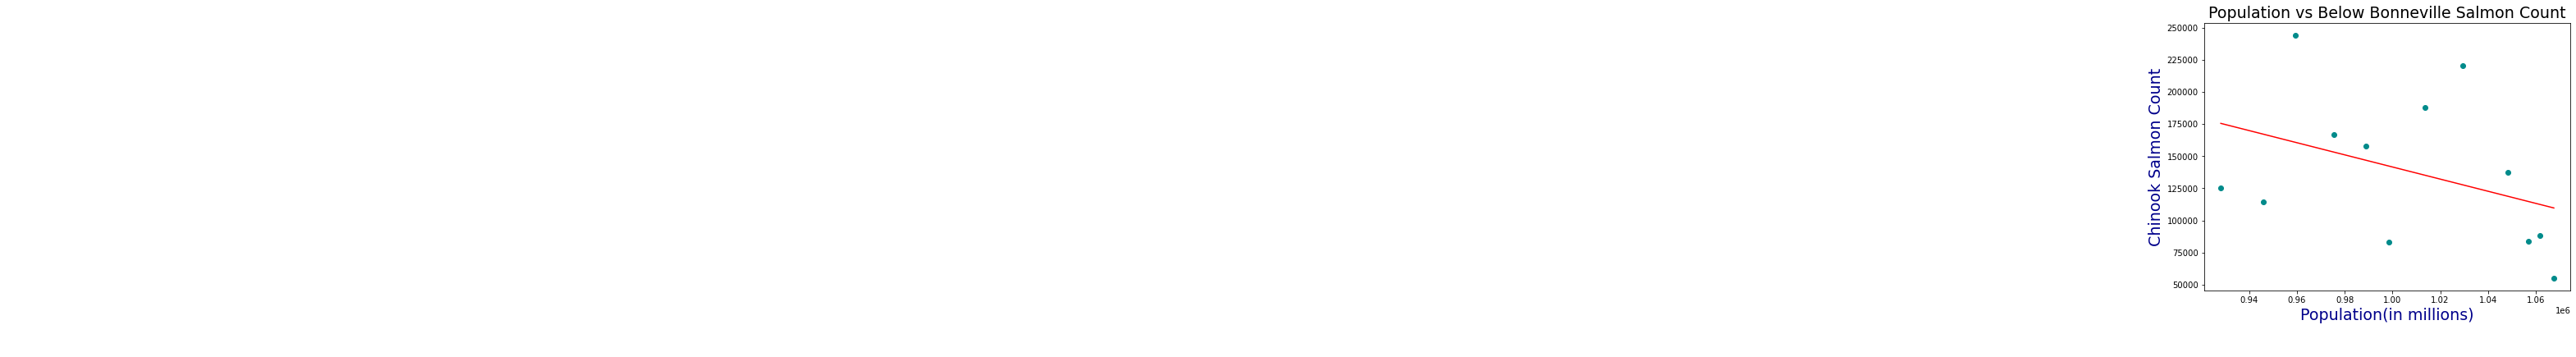

In [40]:
# Plot Portland Metro population vs Below Bonneville salmon count

# Calculate linear regression
plt.figure(figsize = (8,6))
x_values = reduced_yr_census["Total"]
y_values = below_bonneville_df["Chin"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color = "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.title('Population vs Below Bonneville Salmon Count', size = 19)
plt.xlabel('Population(in millions)',size= 19,  color= "darkblue")
plt.ylabel('Chinook Salmon Count', size= 19,  color= "darkblue")


plt.savefig("Annual_Images/Population vs Below Bonneville Salmon Count")
plt.show()   

In [41]:
# Read in willamette salmon data file
willamette_salmon = 'Resources\Willamette_Salmon_Yr_Spr_Count.csv'
willamette_salmon_df = pd.read_csv(willamette_salmon)

# Drop year that isn't included in census data
willamette_salmon_df = willamette_salmon_df.drop([willamette_salmon_df.index[20]])
willamette_salmon_df.to_csv(r'Resources\Willamette_yrs_narrowed.csv', index = False)
willamette_salmon_df

,Project,Year,Dates,Chinook
0,Willamette Falls,2000,3/15 - 5/31,32475
1,Willamette Falls,2001,3/15 - 5/31,41417
2,Willamette Falls,2002,3/15 - 5/31,57163
3,Willamette Falls,2003,3/15 - 5/31,69118
4,Willamette Falls,2004,3/15 - 5/31,81837
5,Willamette Falls,2005,3/15 - 5/31,26956
6,Willamette Falls,2006,3/15 - 5/31,25217
7,Willamette Falls,2007,3/15 - 5/31,16559
8,Willamette Falls,2008,3/15 - 5/31,5679
9,Willamette Falls,2009,3/15 - 5/31,17057


In [42]:
# Calculate correlation between Willamette salmon count and portland metro population
correlation = st.pearsonr(complete_census_df["Total"], willamette_salmon_df["Chinook"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.53


The r-value is: -0.5339070756577232
The r-squared value is: 0.2850567654373818
The p-value is: 0.015320520282314159


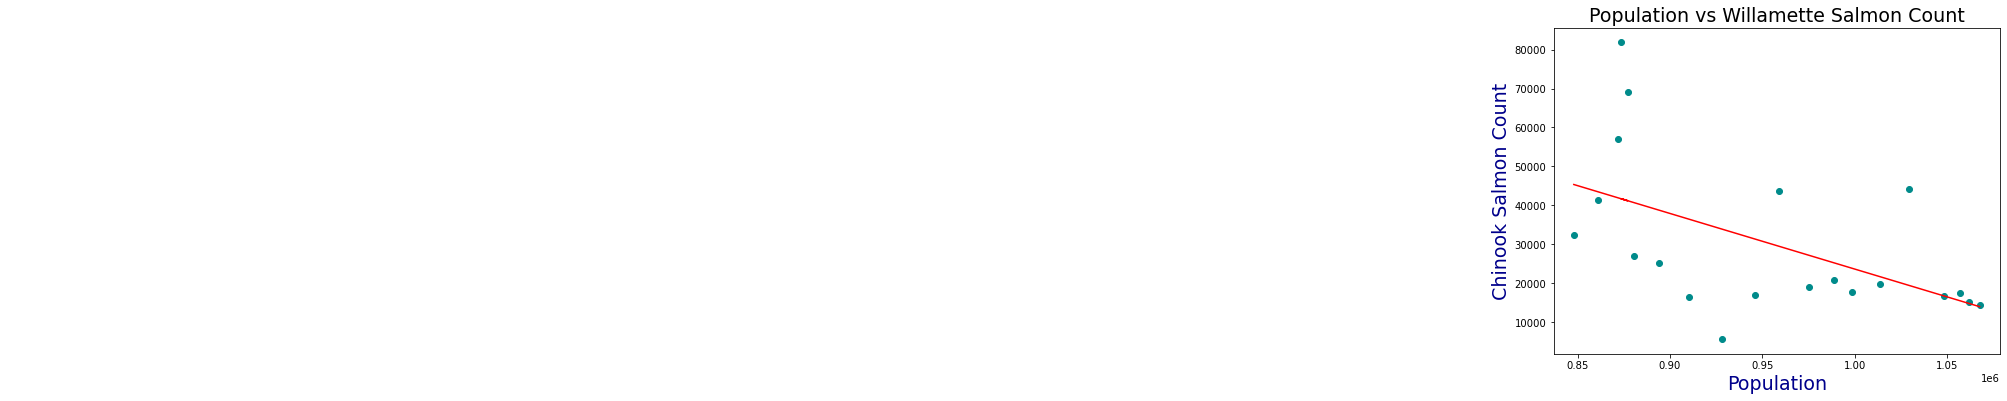

In [47]:
# Plot Portland Metro population vs Willamette salmon count
plt.figure(figsize = (8,6))
x_values = complete_census_df["Total"]
y_values = willamette_salmon_df["Chinook"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color = "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.title('Population vs Willamette Salmon Count', size = 19)
plt.xlabel('Population',size= 19,  color= "darkblue")
plt.ylabel('Chinook Salmon Count', size= 19,  color= "darkblue")


plt.savefig("Annual_Images/Population vs Willamette Salmon Count")
plt.show() 


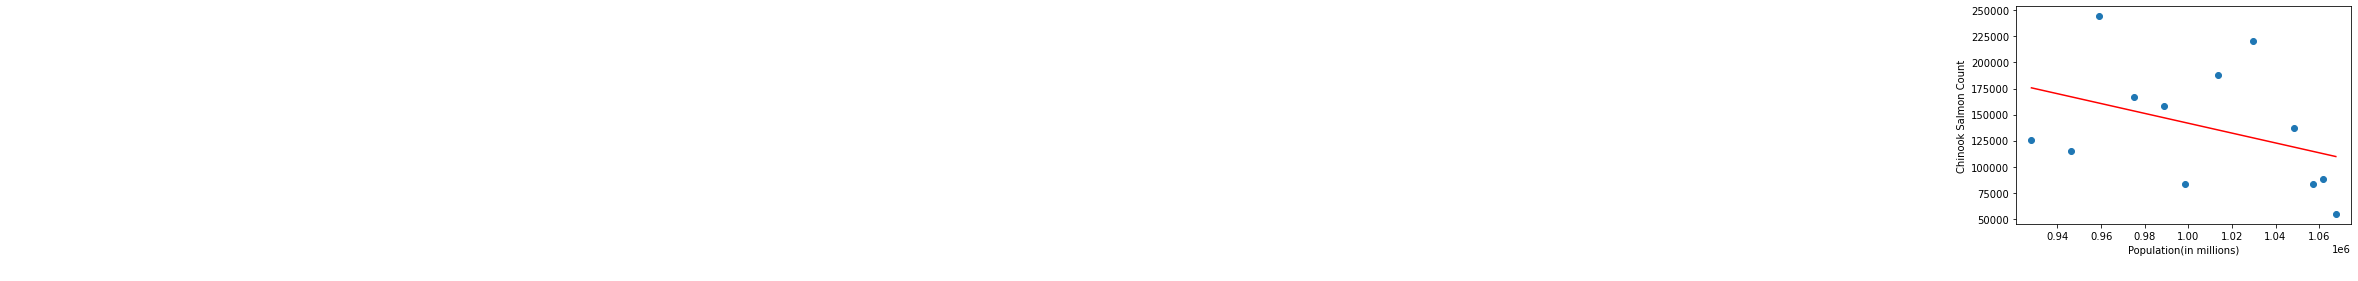

In [45]:
x_values = reduced_yr_census["Total"]
y_values = below_bonneville_df["Chin"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Population(in millions)')
plt.ylabel('Chinook Salmon Count')
plt.show()

The r-value is: -0.38392655190405217
The r-squared value is: 0.14739959725693486
The p-value is: 0.2179148843115568


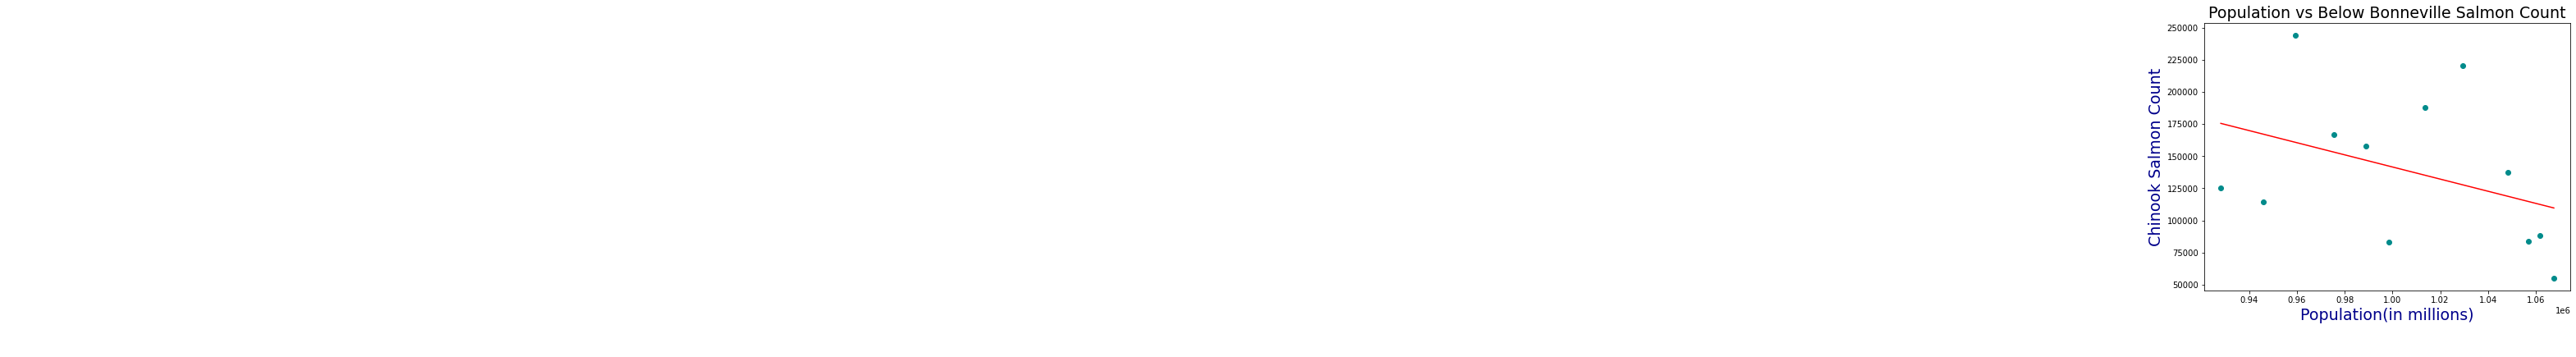

In [46]:
# Plot Portland Metro population vs Below Bonneville salmon count

# Calculate linear regression


plt.figure(figsize = (8,6))
x_values = reduced_yr_census["Total"]
y_values = below_bonneville_df["Chin"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color = "darkcyan")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.title('Population vs Below Bonneville Salmon Count', size = 19)
plt.xlabel('Population(in millions)',size= 19,  color= "darkblue")
plt.ylabel('Chinook Salmon Count', size= 19,  color= "darkblue")


plt.savefig("Annual_Images/Population vs Below Bonneville Salmon Count")
plt.show()  


In [ ]:
## Each scatter plot has a correlation factor that is in the negative. Analysis is that there is a negative correlation between 
# Portland Metro population increase and the salmon population in the surrounding rivers.